In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
from matplotlib import pylab

params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize': 22,
          'axes.labelsize': 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24,
          'figure.figsize' : (8,8),
          }
pylab.rcParams.update(params)

# Section 1: Quick data exploration and preparation

In [14]:
train_set = pd.read_csv('train_clean.csv')
test_set = pd.read_csv('test_clean.csv')

In [15]:
train_set

,PCR_01,PCR_04,PCR_02,PCR_05,PCR_06,PCR_08,PCR_10,PCR_09,sugar_levels,sport_activity,symptom_shortness_of_breath,symptom_sore_throat,symptom_cough,covid_score,symptom_fever,spread_score,blood_type
0,0.563699,0.361760,0.643931,0.252795,0.536282,0.849764,0.607990,0.383910,-0.598615,1.00,0,0,0,-0.882347,1,41.613736,O+
1,0.937373,0.262464,0.490661,0.456612,0.832887,0.589628,0.674511,0.594236,-0.429920,0.25,0,0,0,-1.177741,1,-128.684403,A+
2,0.368002,0.296824,0.367240,0.521415,0.103104,0.271534,0.655058,0.676345,1.706886,0.00,0,0,0,-1.166982,0,37.332799,O+
3,0.594723,0.706008,0.153807,0.477596,0.253433,0.800841,0.206941,-0.375981,1.257032,0.00,0,0,0,11.123661,0,87.011427,O+
4,0.126754,0.873489,0.407132,0.873358,0.751054,0.649924,0.640837,-0.197962,-0.936005,0.00,0,0,0,-0.650897,1,57.303844,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.071283,0.861684,0.529839,1.000000,0.792928,0.686981,0.814149,-0.686344,0.244861,0.00,0,0,0,-3.580083,0,200.225263,O+
1996,0.104163,0.081100,0.639650,0.803125,0.531629,0.871734,0.156013,2.286198,0.582251,0.25,0,0,0,-4.229104,0,39.344975,O+
1997,0.711088,0.134630,0.597521,0.042927,0.803301,0.831394,0.519173,0.593864,1.032105,0.25,0,0,0,-1.102347,0,89.884397,A+
1998,0.458576,0.197873,0.300246,0.054042,0.735624,0.632921,0.347227,0.000000,-0.429920,0.00,0,0,0,-0.591171,0,77.042690,A+


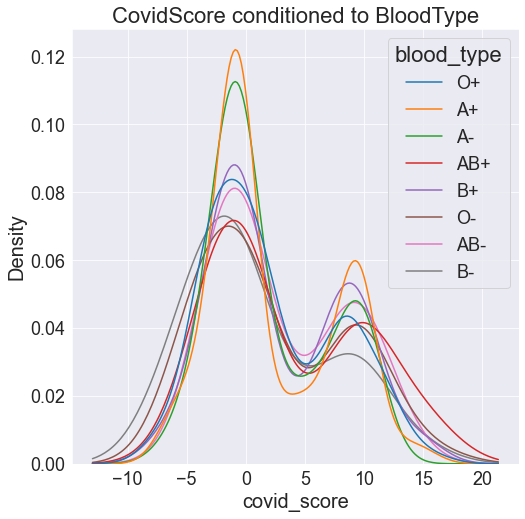

In [16]:
"""Question 1:"""

sns.kdeplot(data=train_set, x='covid_score', hue='blood_type', common_norm=False, common_grid=True)
plt.title("CovidScore conditioned to BloodType")
plt.show()

In [17]:
"""Question 2:"""

def convert_to_groups(x):
    if x == "O+" or x == "O-":
        return "O"
    elif x=="B+" or x == "B-":
        return "B"
    else:
        return "Others"

train_set['blood_type'] = (train_set['blood_type'].apply(convert_to_groups))
train_set

,PCR_01,PCR_04,PCR_02,PCR_05,PCR_06,PCR_08,PCR_10,PCR_09,sugar_levels,sport_activity,symptom_shortness_of_breath,symptom_sore_throat,symptom_cough,covid_score,symptom_fever,spread_score,blood_type
0,0.563699,0.361760,0.643931,0.252795,0.536282,0.849764,0.607990,0.383910,-0.598615,1.00,0,0,0,-0.882347,1,41.613736,O
1,0.937373,0.262464,0.490661,0.456612,0.832887,0.589628,0.674511,0.594236,-0.429920,0.25,0,0,0,-1.177741,1,-128.684403,Others
2,0.368002,0.296824,0.367240,0.521415,0.103104,0.271534,0.655058,0.676345,1.706886,0.00,0,0,0,-1.166982,0,37.332799,O
3,0.594723,0.706008,0.153807,0.477596,0.253433,0.800841,0.206941,-0.375981,1.257032,0.00,0,0,0,11.123661,0,87.011427,O
4,0.126754,0.873489,0.407132,0.873358,0.751054,0.649924,0.640837,-0.197962,-0.936005,0.00,0,0,0,-0.650897,1,57.303844,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.071283,0.861684,0.529839,1.000000,0.792928,0.686981,0.814149,-0.686344,0.244861,0.00,0,0,0,-3.580083,0,200.225263,O
1996,0.104163,0.081100,0.639650,0.803125,0.531629,0.871734,0.156013,2.286198,0.582251,0.25,0,0,0,-4.229104,0,39.344975,O
1997,0.711088,0.134630,0.597521,0.042927,0.803301,0.831394,0.519173,0.593864,1.032105,0.25,0,0,0,-1.102347,0,89.884397,Others
1998,0.458576,0.197873,0.300246,0.054042,0.735624,0.632921,0.347227,0.000000,-0.429920,0.00,0,0,0,-0.591171,0,77.042690,Others


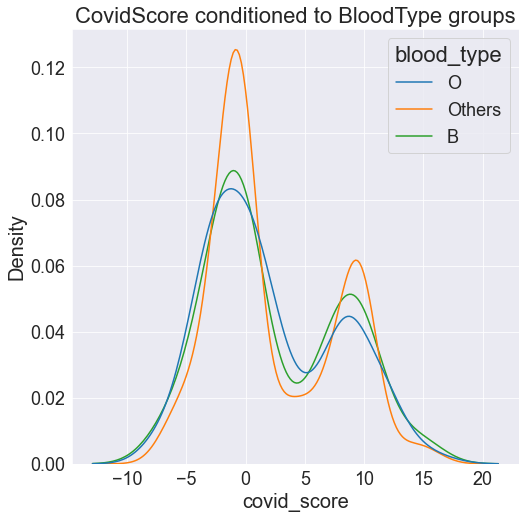

In [18]:
sns.kdeplot(data=train_set, x='covid_score',hue='blood_type', common_norm=False, common_grid=True)
plt.title("CovidScore conditioned to BloodType groups")
plt.show()

In [51]:
"""Question 2": """

def group_blood_type(data):
    data['blood_type_O'] = np.where((data['blood_O+'] == 1) | (data['blood_O-'] == 1), 1, 0)
    data['blood_type_B'] = np.where((data['blood_B+'] == 1) | (data['blood_B-'] == 1)  | (data['blood_AB+'] == 1) | (data['blood_AB-'] == 1), 1, 0)
    data['blood_type_Other'] = np.where((data['blood_A+'] == 1) | (data['blood_A-'] == 1), 1, 0)

    blood_type_list = ['blood_A+', 'blood_A-', 'blood_AB-', 'blood_AB+', 'blood_O+', 'blood_O-', 'blood_B+', 'blood_B-']
    for col in blood_type_list:
        del data[col]

    return data

In [52]:
train = pd.read_csv('train_with_bloodtype.csv')
test = pd.read_csv('test_with_bloodtype.csv')

train.head()

,PCR_01,PCR_02,PCR_04,PCR_05,PCR_06,PCR_08,PCR_09,PCR_10,sugar_levels,sport_activity,...,covid_score,spread_score,blood_A+,blood_A-,blood_AB-,blood_AB+,blood_O+,blood_O-,blood_B+,blood_B-
0,0.563699,0.643931,0.361760,0.252795,0.536282,0.849764,0.383910,0.607990,-0.598615,1.00,...,-0.882347,41.613736,0,0,0,0,1,0,0,0
1,0.937373,0.490661,0.262464,0.456612,0.832887,0.589628,0.594236,0.674511,-0.429920,0.25,...,-1.177741,-128.684403,1,0,0,0,0,0,0,0
2,0.368002,0.367240,0.296824,0.521415,0.103104,0.271534,0.676345,0.655058,1.706886,0.00,...,-1.166982,37.332799,0,0,0,0,1,0,0,0
3,0.594723,0.153807,0.706008,0.477596,0.253433,0.800841,-0.375981,0.206941,1.257032,0.00,...,11.123661,87.011427,0,0,0,0,1,0,0,0
4,0.126754,0.407132,0.873489,0.873358,0.751054,0.649924,-0.197962,0.640837,-0.936005,0.00,...,-0.650897,57.303844,0,1,0,0,0,0,0,0


In [53]:
train = group_blood_type(train)
test = group_blood_type(test)

In [54]:
train.head()

,PCR_01,PCR_02,PCR_04,PCR_05,PCR_06,PCR_08,PCR_09,PCR_10,sugar_levels,sport_activity,symptom_shortness_of_breath,symptom_sore_throat,symptom_cough,symptom_fever,covid_score,spread_score,blood_type_O,blood_type_B,blood_type_Other
0,0.563699,0.643931,0.361760,0.252795,0.536282,0.849764,0.383910,0.607990,-0.598615,1.00,0,0,0,1,-0.882347,41.613736,1,0,0
1,0.937373,0.490661,0.262464,0.456612,0.832887,0.589628,0.594236,0.674511,-0.429920,0.25,0,0,0,1,-1.177741,-128.684403,0,0,1
2,0.368002,0.367240,0.296824,0.521415,0.103104,0.271534,0.676345,0.655058,1.706886,0.00,0,0,0,0,-1.166982,37.332799,1,0,0
3,0.594723,0.153807,0.706008,0.477596,0.253433,0.800841,-0.375981,0.206941,1.257032,0.00,0,0,0,0,11.123661,87.011427,1,0,0
4,0.126754,0.407132,0.873489,0.873358,0.751054,0.649924,-0.197962,0.640837,-0.936005,0.00,0,0,0,1,-0.650897,57.303844,0,0,1


# Section 2: Linear Regression Implementation

In [57]:
y = np.array([1,2,3,4])
y.shape[0]

4

In [58]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np


class LinearRegressor(BaseEstimator, RegressorMixin):
    """
    Custom linear regression model
    """
    def __init__(self, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param lr: the SGD learning rate (step size)
        """
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.zeros(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, X, y):
        """
        Compute the MSE objective loss.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the linear regression objective loss (float scalar)
        """
        m = y.shape[0]
        norm = np.linalg.norm(X.dot(w) + (np.ones(m) * b) - y)
        loss = (1.0 / m) * (norm ** 2)

        return loss


    @staticmethod
    def gradient(w, b: float, X, y):
        """
        Compute the (analytical) linear regression objective gradient.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical gradient w.r.t w and b
        m = y.shape[0]
        g_w = (1.0 / m) * 2 * X.T.dot(X.dot(w) + (np.ones(m) * b) - y)
        g_b = 2 * b + (2.0 / m) * np.sum(X.dot(w) - y)

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 1000, keep_losses: bool = True,
                      X_val  =None, y_val = None):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses: should compute the train & val losses during training?
        :param X_val: validation samples to compute the loss for (for logs only)
        :param y_val: validation labels to compute the loss for (for logs only)
        :return: training and validation losses during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        train_losses = []
        val_losses = []

        if keep_losses:
            train_losses.append(self.loss(self.w, self.b, X, y))
            val_losses.append(self.loss(self.w, self.b, X_val, y_val))

        # Iterate over batches (SGD)
        for itr in range(0, max_iter):
            start_idx = (itr * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]

            # TODO: Compute the gradient for the current *batch*
            g_w, g_b = self.gradient(self.w , self.b , batch_X , batch_y)

            # Perform a gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - g_w * self.lr
            self.b = self.b - g_b * self.lr

            if keep_losses:
                train_losses.append(self.loss(self.w, self.b,  X, y))
                val_losses.append(self.loss(self.w, self.b,  X_val, y_val))

        return train_losses, val_losses

    def fit(self, X, y, max_iter: int = 1000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Regress labels on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted continuous labels for samples in X; array of shape (n_samples,)
        """

        # TODO: Compute
        y_pred = X.dot(self.w) + self.b

        return y_pred

In [59]:
def numerical_subgradient(w, b, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = LinearRegressor.loss(w_, b, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = LinearRegressor.loss(w_, b, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (LinearRegressor.loss(w_, b + delta, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=10, figsize=(10, 6)):
    residual_means_w = []
    residual_means_b = []

    for delta in deltas:
        residuals_w = []
        residuals_b = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad_w, analytic_grad_b = LinearRegressor.gradient(w, b, X, y)

            numeric_grad_w, numeric_grad_b = numerical_subgradient(w, b, X, y, delta=delta)

            residual_w = np.linalg.norm(numeric_grad_w - analytic_grad_w)
            residuals_w.append(residual_w)

            residual_b = np.linalg.norm(numeric_grad_b - analytic_grad_b)
            residuals_b.append(residual_b)

        residual_means_w.append(np.mean(residuals_w))
        residual_means_b.append(np.mean(residuals_b))

    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    plt.suptitle('Residuals of analytical and numerical gradients',
                 fontsize=22, fontweight="bold")
    axs[0].set_title(r'Residuals of $\nabla_{w}L\left(w,b\right)$')
    axs[1].set_title(r'Residuals of $\frac{\partial}{\partial{b}}L\left(w,b\right)$')
    axs[0].plot(deltas, residual_means_w, linewidth=3)
    axs[1].plot(deltas, residual_means_b, linewidth=3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[0].set_xlabel('$\delta_w$', fontsize=18)
    axs[1].set_xlabel('$\delta_b$', fontsize=18)
    axs[0].set_ylabel(r'$\left\Vert \nabla_{w}L\left(w,b\right) - u_{\delta_w} \left(w,b\right)\right\Vert$',
                      fontsize=18)
    axs[1].set_ylabel(
        r'$\left\Vert \frac{\partial}{\partial{b}}L\left(w,b\right) - u_{\delta_b} \left(w,b\right)\right\Vert$',
        fontsize=18)

    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()

In [60]:
"""Question 4:"""

from sklearn.model_selection import train_test_split
yoav_id = '212617864'
mor_id = '211810452'
random_state = int(yoav_id[-1]) + int(yoav_id[-2]) + int(mor_id[-1]) + int(mor_id[-2])

train_subset , validation_subset = train_test_split(train, test_size=0.2, random_state=random_state)

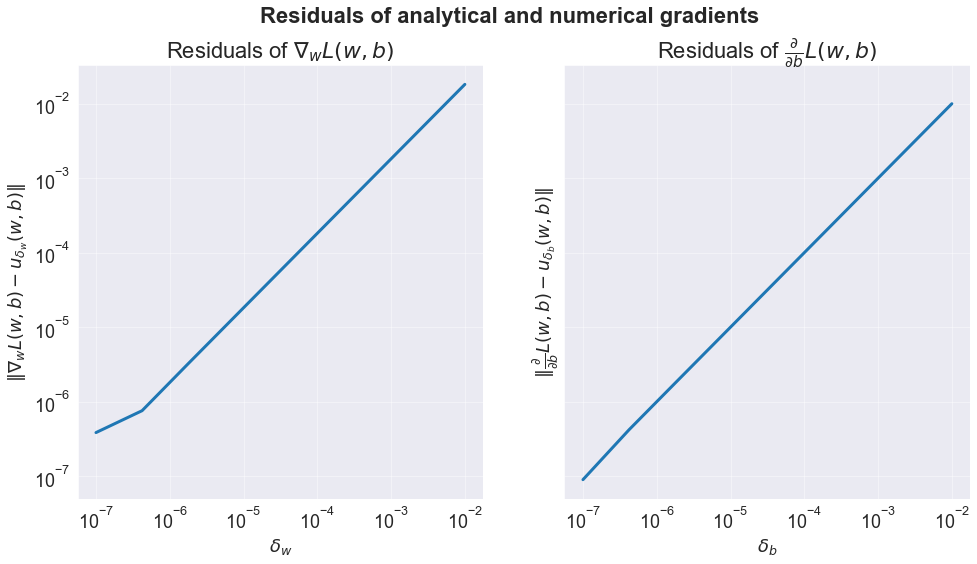

In [61]:
"""Question 4:"""

x_train_subset = train_subset.drop(['covid_score','spread_score'],axis=1)
y_train_subset = train_subset['covid_score']


compare_gradients(x_train_subset, y_train_subset, deltas=np.logspace(-7, -2, 9))

In [62]:
def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
    lr_list = np.logspace(-9, -1, 9)

    fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
    plt.suptitle(title, fontsize=32)
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.5, top=0.9)

    axs = np.ravel(axs)
    for i, lr in enumerate(lr_list):
        cur_linear_reggressor = LinearRegressor(lr)
        train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
        print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

        iterations = np.arange(max_iter + 1)
        axs[i].semilogy(iterations, train_losses, label="Train")
        axs[i].semilogy(iterations, val_losses, label="Validation")
        axs[i].grid(alpha=0.5)
        axs[i].legend()
        axs[i].set_title('lr = '+str(lr))
        axs[i].set_xlabel('iteration')
        axs[i].set_ylabel('MSE')

lr size = 1e-09, Best train loss = 34.22579439827299, Best validation loss = 36.80731940088342
lr size = 1e-08, Best train loss = 34.22449046004204, Best validation loss = 36.805802991413
lr size = 1e-07, Best train loss = 34.21146178573106, Best validation loss = 36.79065081454511
lr size = 1e-06, Best train loss = 34.08223864668551, Best validation loss = 36.640313143765894
lr size = 1e-05, Best train loss = 32.8895281579369, Best validation loss = 35.248032397709274
lr size = 0.0001, Best train loss = 26.54860222505493, Best validation loss = 27.71536409049341
lr size = 0.001, Best train loss = 11.8181475018115, Best validation loss = 12.258394646299434
lr size = 0.01, Best train loss = 3.306119318889519, Best validation loss = 4.277383963190024
lr size = 0.1, Best train loss = 3.204446320279087, Best validation loss = 4.207575570746791


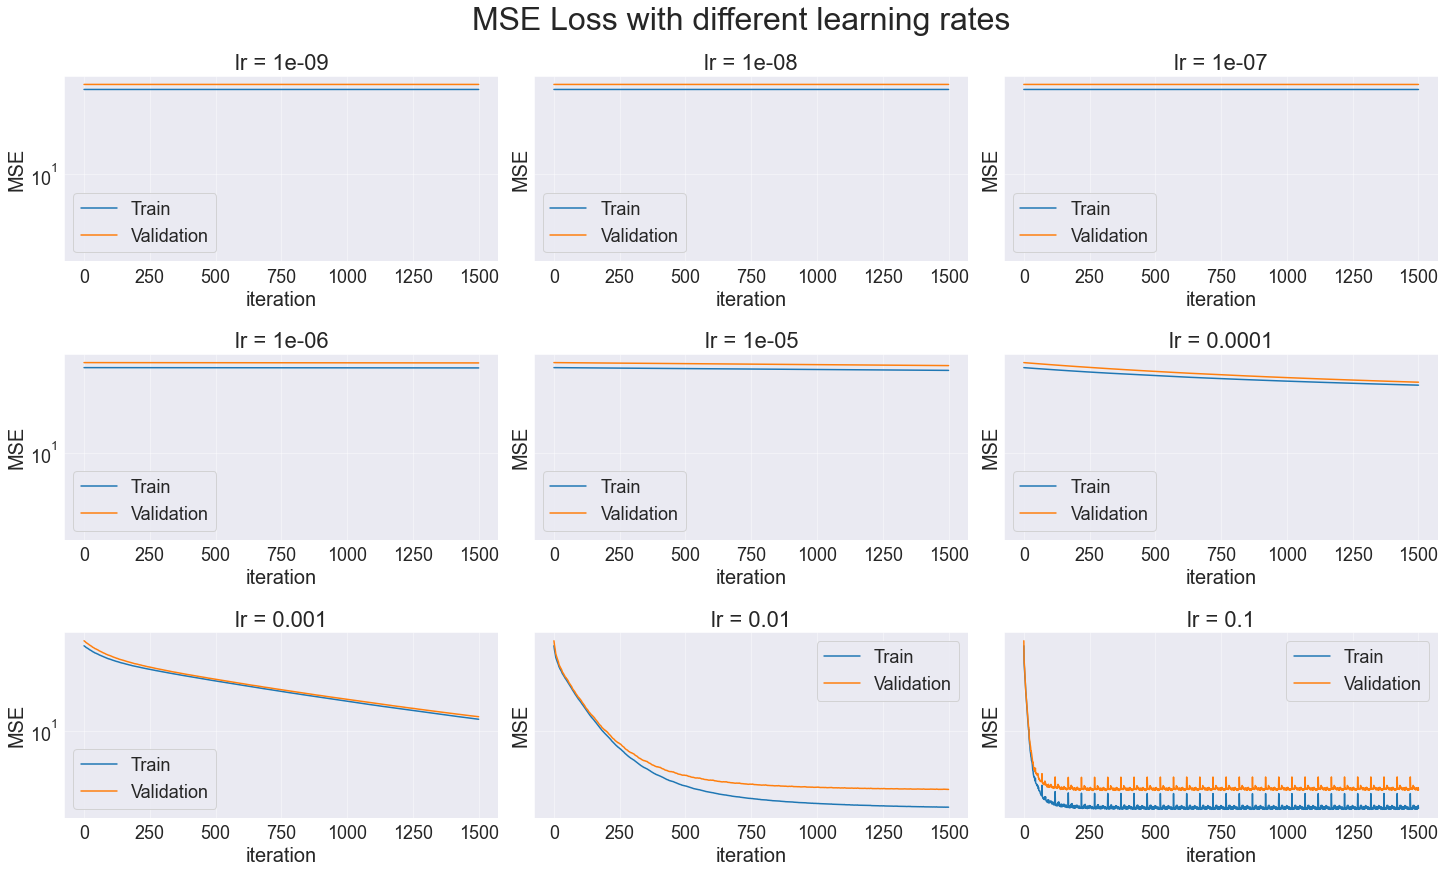

In [63]:
"""Question 5:"""

x_validation = validation_subset.drop(['covid_score','spread_score'],axis=1)
y_validation = validation_subset['covid_score']

test_lr(x_train_subset, y_train_subset, x_validation, y_validation, "MSE Loss with different learning rates")

In [64]:
def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-3, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)
  
  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 0.001, Best train loss = 11.8181475018115, Best validation loss = 12.258394646299434
lr size = 0.0017782794100389228, Best train loss = 7.334967164017127, Best validation loss = 7.875165039254145
lr size = 0.0031622776601683794, Best train loss = 4.64619195269147, Best validation loss = 5.362730745987194
lr size = 0.005623413251903491, Best train loss = 3.6247009564112536, Best validation loss = 4.507333704052205
lr size = 0.01, Best train loss = 3.306119318889519, Best validation loss = 4.277383963190024
lr size = 0.01778279410038923, Best train loss = 3.2222574708428535, Best validation loss = 4.222410030848775
lr size = 0.03162277660168379, Best train loss = 3.2023852418572085, Best validation loss = 4.211582228159667
lr size = 0.05623413251903491, Best train loss = 3.19774951367734, Best validation loss = 4.2033016271400765
lr size = 0.1, Best train loss = 3.204446320279087, Best validation loss = 4.207575570746791


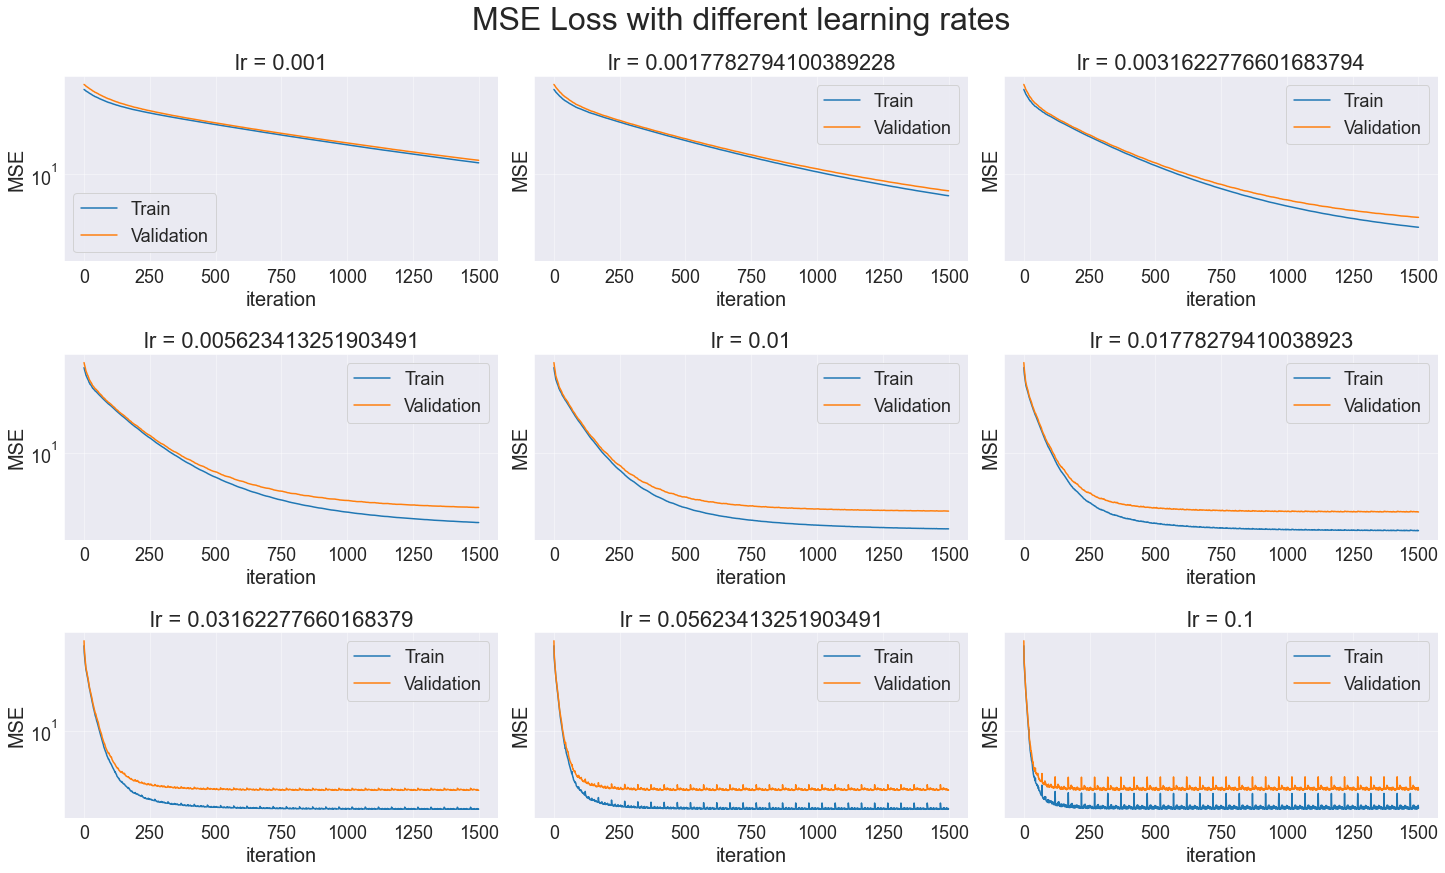

In [65]:
test_lr(x_train_subset, y_train_subset, x_validation, y_validation, "MSE Loss with different learning rates")

# Section 3: Evaluation and Baseline

In [159]:
"""Question 6:"""

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate


x_train_set = train_set.drop(['covid_score','spread_score'],axis=1)
y_train_set = train_set['covid_score']

dm = DummyRegressor()
cv = cross_validate(dm, x_train_set, y_train_set, scoring='neg_mean_squared_error', cv = None,return_train_score =True)
print(cv['test_score'].mean())
print(cv['train_score'].mean())

-29.737422745413802
-29.69982514942593


In [160]:
dm.fit(x_train_set,y_train_set)

DummyRegressor()

In [161]:

x_train_set = train_set.drop(['covid_score','spread_score'],axis=1)
y_train_set = train_set['covid_score']

log_jump = np.logspace(-3, -0.5, num=10)
results_train = []
results_test = []

for h in log_jump:
    lr = LinearRegressor(h)
    cv = cross_validate(lr, x_train_set, y_train_set, cv=5,scoring='neg_mean_squared_error' ,return_train_score =True)
    results_train.append(round(cv['train_score'].mean(),3))
    results_test.append(round(cv['test_score'].mean(),3))




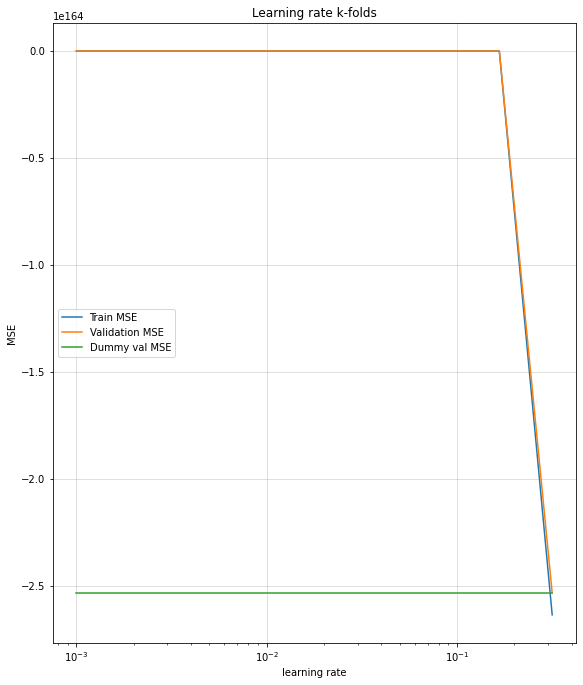

In [162]:

fig, axs = plt.subplots(1,1, sharey=True, figsize=(8, 10))
plt.tight_layout()
fig.subplots_adjust(hspace=0.5, top=0.9)

axs = np.ravel(axs)
i = 0
axs[i].semilogx(log_jump, results_train, label="Train MSE")
axs[i].semilogx(log_jump, results_test, label="Validation MSE")
axs[i].semilogx(log_jump, [round(cv['test_score'].mean(),3)] * len(log_jump), label='Dummy val MSE')
axs[i].grid(alpha=0.5)
axs[i].legend()

axs[i].set_title('Learning rate k-folds')
axs[i].set_xlabel('learning rate')
_ = axs[i].set_ylabel('MSE')

In [163]:
best_lr_index = np.argmax(results_test)
best_lr = round(log_jump[best_lr_index], 3)
print(f'Linear best lr: {best_lr}')
print(f'Linear best lr train MSE: {round(results_train[best_lr_index], 3)}')
print(f'Linear best lr val MSE: {round(results_test[best_lr_index], 3)}')

Linear best lr: 0.024
Linear best lr train MSE: -3.442
Linear best lr val MSE: -3.499


In [164]:
linear_regressor = LinearRegressor(best_lr)
linear_regressor.fit(x_train_set,y_train_set)

LinearRegressor(lr=0.024)

In [165]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-2,2,20)
results_train = []
results_test = []

for alpha in alphas:
    ridge = Ridge(alpha= alpha,fit_intercept= True)
    cv = cross_validate(ridge, x_train_set, y_train_set, cv=5,scoring='neg_mean_squared_error' ,return_train_score =True)
    results_train.append(round(cv['train_score'].mean(),3))
    results_test.append(round(cv['test_score'].mean(),3))

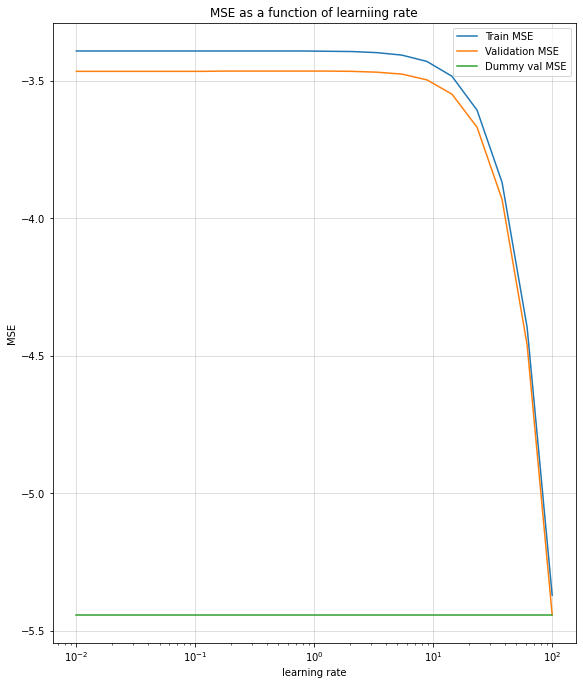

In [166]:

fig, axs = plt.subplots(1,1, sharey=True, figsize=(8, 10))
plt.tight_layout()
fig.subplots_adjust(hspace=0.5, top=0.9)

axs = np.ravel(axs)
i = 0
axs[i].semilogx(alphas, results_train, label="Train MSE")
axs[i].semilogx(alphas, results_test, label="Validation MSE")
axs[i].semilogx(alphas, [round(cv['test_score'].mean(),3)] * len(alphas), label='Dummy val MSE')
axs[i].grid(alpha=0.5)
axs[i].legend()

axs[i].set_title('MSE as a function of learniing rate')
axs[i].set_xlabel('learning rate')
_ = axs[i].set_ylabel('MSE')

In [167]:
best_alpha_index = np.argmax(results_test)
best_alpha = round(alphas[best_alpha_index], 2)
print(f' best alpha: {best_alpha}')
print(f' best alpha train MSE: {round(results_train[best_alpha_index], 3)}')
print(f' best alpha val MSE: {round(results_test[best_alpha_index], 3)}')

 best alpha: 0.18
 best alpha train MSE: -3.392
 best alpha val MSE: -3.465


In [168]:
ridge_regressor = Ridge(best_alpha,fit_intercept=True)
ridge_regressor.fit(x_train_set,y_train_set)

Ridge(alpha=0.18)

In [169]:
print(sorted(zip(train_set.columns,abs(ridge_regressor.coef_)), key=lambda x: x[1], reverse=True))


[('symptom_sore_throat', 9.826758066863563), ('sport_activity', 5.22817228921554), ('symptom_shortness_of_breath', 4.652281503608506), ('PCR_01', 3.6286706913613407), ('symptom_cough', 0.6208086657956405), ('PCR_04', 0.49833319219351563), ('PCR_09', 0.217988438132897), ('PCR_08', 0.2130357268631821), ('PCR_02', 0.1676051357629351), ('sugar_levels', 0.06963791255840779), ('PCR_05', 0.06694244214288006), ('PCR_06', 0.03826784785780613), ('covid_score', 0.019349674186076252), ('PCR_10', 0.014632124472602148), ('spread_score', 0.007930537277235587), ('symptom_fever', 0.006708741801138937), ('blood_B', 0.0012217954738754473)]


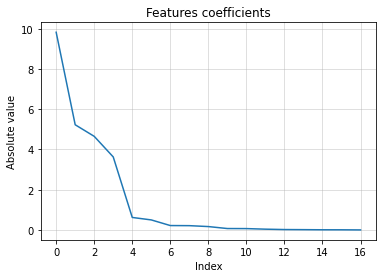

In [170]:
graph = list(sorted(abs(ridge_regressor.coef_), reverse=True))
sns.lineplot(x=range(len(graph)), y=graph)
plt.grid(alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Absolute value')
plt.title("Features coefficients")
plt.show()